**Packages Requirement**

*   Keras
*   Tensorflow
* Numpy
* Pandas
* Gensim
* sklearn



#### Load the dataset from kaggle or from google drive mounted on colab

Dataset: https://www.kaggle.com/c/quora-question-pairs/data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cp /content/gdrive/My\ Drive/MS-CS/DS/train.csv .

In [0]:
!cp /content/gdrive/My\ Drive/MS-CS/DS/test.csv .

In [0]:
!cp /content/gdrive/My\ Drive/MS-CS/SMDM/LSWList.txt .

In [7]:
!ls -la .

total 528348
drwxr-xr-x 1 root root      4096 Dec  8 02:33 .
drwxr-xr-x 1 root root      4096 Dec  8 02:31 ..
drwxr-xr-x 1 root root      4096 Dec  5 17:39 .config
drwx------ 3 root root      4096 Dec  8 02:33 gdrive
-rw------- 1 root root      4171 Dec  8 02:33 LSWList.txt
drwxr-xr-x 2 root root      4096 Dec  5 17:39 sample_data
-rw------- 1 root root 477592983 Dec  8 02:33 test.csv
-rw------- 1 root root  63399110 Dec  8 02:33 train.csv


In [8]:
!pip install gensim

    100% |████████████████████████████████| 23.6MB 1.8MB/s 
    100% |████████████████████████████████| 1.4MB 10.1MB/s 
    100% |████████████████████████████████| 133kB 26.8MB/s 
    100% |████████████████████████████████| 61kB 23.0MB/s 
    100% |████████████████████████████████| 5.1MB 8.1MB/s 
    100% |████████████████████████████████| 552kB 24.7MB/s 
  Running setup.py bdist_wheel for smart-open ... - done
  Stored in directory: /root/.cache/pip/wheels/23/00/44/e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /root/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


# Data Pre-Processing

#### Import required libraries

In [0]:
import numpy as np
import pandas as pd
import re
import nltk
import pickle

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

#### Load dataset

In [0]:
df_train = pd.read_csv('train.csv', encoding='utf-8', low_memory=False)

In [134]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [231]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


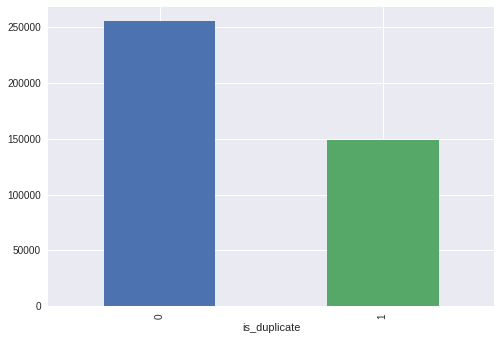

In [233]:
# Class distribution
df_train.groupby("is_duplicate")['id'].count().plot.bar()

In [0]:
# df_test = pd.read_csv('test.csv', encoding='utf-8', low_memory=False)

In [0]:
# df_test.head()

In [16]:
from nltk.corpus import stopwords 
nltk.download('punkt')

import string
strippables = string.punctuation + string.whitespace

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

from nltk.tokenize import word_tokenize , TweetTokenizer
tweet_tokenize = TweetTokenizer()

nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
stopWordList = set()

with open('LSWList.txt', encoding='utf-8', errors="surrogateescape") as f:
    for line in f:
        stringVal = repr(line)
        # Remove all the special characters - data cleaning
        stopWordList.add(stringVal.replace('\\n', '').strip(strippables).lower())

In [0]:
def tokenizeCustom(strVal):
  strUpdated = []
  stringCleaned = re.sub("[^a-zA-Z]", " ", str(strVal))
  for word in tweet_tokenize.tokenize(stringCleaned):
    if word not in stopWordList:
#       newWord = lemmatizer.lemmatize(stemmer.stem(word.lower()))
      newWord = word.lower()
      if newWord != '':
        strUpdated.append(newWord)
  if len(strUpdated) == 0:
    strUpdated.append(' ')

  return strUpdated

In [236]:
tokenizeCustom('')

[' ']

In [0]:
# print(df_test.iloc[0][1])
# print(re.sub("[^a-zA-Z]", " ", str(df_test.iloc[0][1])))

In [0]:
# df_test['question1_token'] = df_test.apply(lambda row: tokenizeCustom(row['question1']), axis=1)

In [0]:
# df_test['question2_token'] = df_test.apply(lambda row: tokenizeCustom(row['question2']), axis=1)

In [0]:
# df_train['question1_token'] = df_train.apply(lambda row: tokenizeCustom(row['question1']), axis=1)

In [0]:
# df_train['question2_token'] = df_train.apply(lambda row: tokenizeCustom(row['question2']), axis=1)

In [0]:
train_question1 = []
train_question2 = []
for i, row in df_train.iterrows():
  train_question1.append(tokenizeCustom(row['question1']))
  train_question2.append(tokenizeCustom(row['question2']))

In [142]:
print(len(train_question1))
print(len(train_question2))

404290
404290


In [143]:
print('Saving model...')
import pickle
with open('train_question1.pkl', 'wb') as output:
    pickle.dump(train_question1, output, pickle.HIGHEST_PROTOCOL)
with open('train_question2.pkl', 'wb') as output:
    pickle.dump(train_question2, output, pickle.HIGHEST_PROTOCOL)
print('Done.')

Saving model...
Done.


In [0]:
# test_question1 = []
# test_question2 = []
# for i, row in df_test.iterrows():
#   test_question1.append(tokenizeCustom(row['question1']))
#   test_question2.append(tokenizeCustom(row['question2']))

In [0]:
# print('Saving model...')
# import pickle
# with open('test_question1.pkl', 'wb') as output:
#     pickle.dump(test_question1, output, pickle.HIGHEST_PROTOCOL)
# with open('test_question2.pkl', 'wb') as output:
#     pickle.dump(test_question2, output, pickle.HIGHEST_PROTOCOL)
# print('Done.')

### Using TF-IDF to predict the similarity of the questions

In [0]:
# Import the libraries
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# Compute cosine similarity
def cosine_sim(text1, text2):
  tfidf = vectorizer.fit_transform([text1, text2])
  return ((tfidf * tfidf.T).A)[0,1]

In [0]:
# Create the sentence values with the stop words removed
questions1_tfidf = []
for i in range(len(train_question1)):
  questions1_tfidf.append(' '.join(train_question1[i]))
  
questions2_tfidf = []
for i in range(len(train_question2)):
  questions2_tfidf.append(' '.join(train_question2[i]))
    

In [0]:
# Calculate the similarity scores
tfidf_similarity_scores = []

for i in range(len(questions1_tfidf)):
  tfidf_similarity_scores.append(cosine_sim(questions1_tfidf[i], questions2_tfidf[i]))

In [0]:
# Calculate the prediction value
predictions = []
for score in tfidf_similarity_scores:
  if score >= 0.5:
    predictions.append(1)
  else:
    predictions.append(0)

In [176]:
# Calculate the accuracy values
accuracy = accuracy_score(df_train.is_duplicate[:], predictions)
print("Accuracy score is {}".format(accuracy))

Accuracy score is 0.668166415197012


In [177]:
# Calculate the confusion matrix values
print("Confusion Matrix:")
print(confusion_matrix(df_train.is_duplicate[:], predictions))

Confusion Matrix:
[[182354  72673]
 [ 61484  87779]]


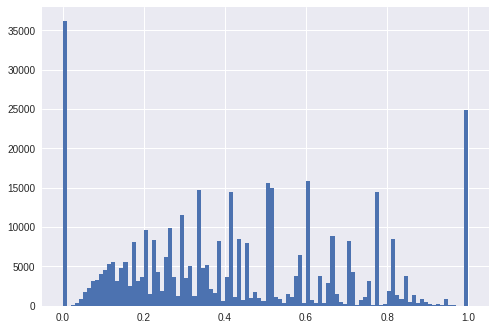

In [178]:
# Plot the scores distribution
plt.hist(Tfidf_scores, bins=100)
plt.show()

In [0]:
# !cp -r *.pkl /content/gdrive/My\ Drive/MS-CS/DS/

In [0]:
# !cp -r /content/gdrive/My\ Drive/MS-CS/DS/*.pkl .

In [32]:
!ls -la

total 926608
drwxr-xr-x 1 root root      4096 Dec  8 02:34 .
drwxr-xr-x 1 root root      4096 Dec  8 02:31 ..
drwxr-xr-x 1 root root      4096 Dec  5 17:39 .config
drwx------ 3 root root      4096 Dec  8 02:33 gdrive
-rw------- 1 root root      4171 Dec  8 02:33 LSWList.txt
drwxr-xr-x 2 root root      4096 Dec  5 17:39 sample_data
-rw------- 1 root root 477592983 Dec  8 02:33 test.csv
-rw------- 1 root root 183652316 Dec  8 02:34 test_question1.pkl
-rw------- 1 root root 183301872 Dec  8 02:34 test_question2.pkl
-rw------- 1 root root  63399110 Dec  8 02:33 train.csv
-rw------- 1 root root  20396414 Dec  8 02:34 train_question1.pkl
-rw------- 1 root root  20448802 Dec  8 02:34 train_question2.pkl


In [0]:
train_question1 = pickle.load(open('train_question1.pkl', 'rb'))
train_question2 = pickle.load(open('train_question2.pkl', 'rb'))

In [0]:
question_list = train_question1 + train_question2

### Analysis of the minimum sentence length and maximum sentence length

In [0]:
maxLength = 0
minLength = 9999
for q in question_list:
  length = len(q)
#   print(length)
  if maxLength < max(maxLength, length):
    maxLength = max(maxLength, length)
  if minLength > min(minLength, length):
    minLength = min(minLength, length)

In [43]:
print(maxLength, minLength)

94 1


### Keras Tokenizer for pre-processing of text values

In [46]:
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
# Setting vocab size of 50,000 and tokenizing the data
vocabulary_size = 20000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(question_list)

In [0]:
# Generating the sequence values and padding to a length of 100
sequence1 = tokenizer.texts_to_sequences(train_question1)
data_q1 = pad_sequences(sequence1, maxlen=100)

In [0]:
# Generating the sequence values and padding to a length of 100
sequence2 = tokenizer.texts_to_sequences(train_question2)
data_q2 = pad_sequences(sequence2, maxlen=100)

In [50]:
# Vectorized data
data_q1[1000]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    3,    2,  500, 1706,  284, 6355,  306,
        629], dtype=int32)

### Loading the glove embeddings for the list of words in the dataset

Link to glove file http://nlp.stanford.edu/data/glove.6B.zip

In [0]:
! cp gdrive/My\ Drive/MS-CS/SMDM/glove.6B.zip glove.6B.zip

In [52]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [53]:
# Load embedding values
embeddings_index = dict()
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [0]:
# Weight matrix for words
embedding_matrix = np.zeros((vocabulary_size, 100))
for word, index in tokenizer.word_index.items():
    if index > vocabulary_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

### Randomizing the dataset

In [0]:
y_values = df_train.iloc[:,5].values

In [56]:
print(len(train_question1))
print(len(train_question2))
print(len(y_values))

404290
404290
404290


In [0]:
# Random Indices created to shuffle the data
rand_indices = np.arange(len(train_question1))
np.random.shuffle(rand_indices)

In [58]:
rand_indices

array([351111, 110979, 150046, ...,  33961, 164176, 232522])

In [59]:
data_q1[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    1,  508,  508, 1697,  154,  365,   92,
          8], dtype=int32)

In [0]:
# Randomizing the data set
data_q1 = data_q1[rand_indices]
data_q2 = data_q2[rand_indices]
y_values = y_values[rand_indices]

In [61]:
data_q1[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,   18, 1243,   32, 4210, 3621, 4789,   58,    3, 1117,    1,
          9], dtype=int32)

### Splitting data for train and test

In [0]:
# Splitting the data to train and test
q1_train = data_q1[40000:]
q1_test = data_q1[:40000]

q2_train = data_q2[40000:]
q2_test = data_q2[:40000]

y_values_train = y_values[40000:]
y_values_test = y_values[:40000]

In [63]:
print('Length of the data splits: ')
print(len(y_values_train))
print(len(y_values_test))

Length of the data splits: 
364290
40000


# Keras Model

### Import Keras libaries

In [0]:
from keras.models import load_model
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, LSTM, GRU, Lambda, merge, Dropout, Dense
from keras.models import Model, Sequential
from keras import backend as K
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

### Glove based RNN 

In [65]:
#Create input variables
input_shape = (100, )
left_input = Input(input_shape)
right_input = Input(input_shape)

# Create the first model with 1D-CNN and LSTM
model_glove = Sequential()

# Use the embedding layer and initalize with glove weights
model_glove.add(Embedding(vocabulary_size, 100, input_length=100, weights=[embedding_matrix], trainable=False))

# 1D-Convloutional Layer to increase the speed of the application
model_glove.add(Conv1D(64, 5, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=4))
model_glove.add(Conv1D(128, 5, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=4))

# Add LSTM Layer
model_glove.add(LSTM(256, return_sequences = True))
model_glove.add(LSTM(512, return_sequences = True))
model_glove.add(LSTM(256, dropout=0.2))
model_glove.add(Dense(2048, activation='sigmoid'))
model_glove.summary()

# Load for each of the input
encoded_l_glove = model_glove(left_input)
encoded_r_glove = model_glove(right_input)

# Calculate the least absolute deviations (L1 Norm) for each tensor
L1_layer_glove = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))

# Get the L1-NORM for both the input embedded variables
L1_distance_glove = L1_layer_glove([encoded_l_glove, encoded_r_glove])

# Fully Connected Layer with dropouts
dense1_glove = Dense(1024,activation='relu')(L1_distance_glove)
dropout1_glove = Dropout(0.2)(dense1_glove)

# Fully Connected Layer with dropouts
dense2_glove = Dense(512,activation='relu')(dropout1_glove)
dropout2_glove = Dropout(0.2)(dense2_glove)

# Generate the output value
output_glove = Dense(1,activation='sigmoid')(dropout2_glove)

# Initialize the model with inputs and outputs
siamese_network_glove = Model(inputs=[left_input,right_input],outputs=output_glove)

# Adam optimizer to get optimal values
optimizer = Adam(0.0001)
siamese_network_glove.compile(loss="binary_crossentropy",optimizer=optimizer, metrics=['accuracy'])

# Generate the finaly summary of the classifier
siamese_network_glove.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          2000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 64)            32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 20, 128)           41088     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 256)            394240    
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 512)            1574912   
__________

#### To check how the model trains for a very small dataset

In [66]:
history_nn_glove = siamese_network_glove.fit([q1_train[:2000], q2_train[:2000]], y_values_train[:2000], validation_split=0.2, epochs = 10, batch_size=128)

Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 10s 6ms/step - loss: 0.6914 - acc: 0.6138 - val_loss: 0.6888 - val_acc: 0.6250
Epoch 2/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6862 - acc: 0.6212 - val_loss: 0.6824 - val_acc: 0.6250
Epoch 3/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6781 - acc: 0.6212 - val_loss: 0.6723 - val_acc: 0.6250
Epoch 4/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6624 - acc: 0.6212 - val_loss: 0.6525 - val_acc: 0.6250
Epoch 5/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6384 - acc: 0.6212 - val_loss: 0.6580 - val_acc: 0.6250
Epoch 6/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6243 - acc: 0.6212 - val_loss: 0.6544 - val_acc: 0.6250
Epoch 7/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6155 - acc: 0.6212 - val_loss: 0.6599 - val_acc: 0.6250
Epoch 8/10
160

#### Running the model in complete dataset

In [67]:
history_nn_glove = siamese_network_glove.fit([q1_train, q2_train], y_values_train, validation_split=0.2, epochs = 5, batch_size=128)

Train on 291432 samples, validate on 72858 samples
Epoch 1/5
291432/291432 [==============================] - 285s 979us/step - loss: 0.5952 - acc: 0.6665 - val_loss: 0.5839 - val_acc: 0.6754
Epoch 2/5
291432/291432 [==============================] - 285s 976us/step - loss: 0.5578 - acc: 0.7064 - val_loss: 0.5886 - val_acc: 0.6830
Epoch 3/5
291432/291432 [==============================] - 284s 974us/step - loss: 0.5304 - acc: 0.7304 - val_loss: 0.6031 - val_acc: 0.6913
Epoch 4/5
291432/291432 [==============================] - 283s 972us/step - loss: 0.5081 - acc: 0.7460 - val_loss: 0.6152 - val_acc: 0.6952
Epoch 5/5
291432/291432 [==============================] - 284s 974us/step - loss: 0.4904 - acc: 0.7589 - val_loss: 0.6358 - val_acc: 0.6889


### Plot the train summary

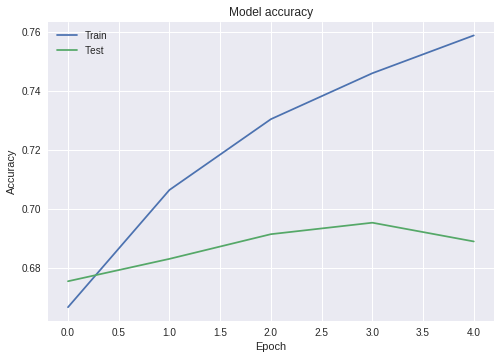

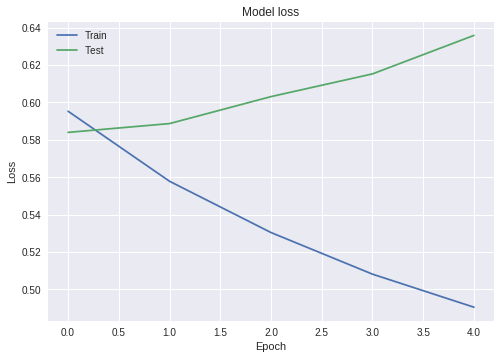

In [68]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_nn_glove.history['acc'])
plt.plot(history_nn_glove.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_nn_glove.history['loss'])
plt.plot(history_nn_glove.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# Save the final siamese neural network as a file for later use
siamese_network_glove.save('siamese_network_glove.h5')

In [0]:
!cp siamese_network_glove.h5 /content/gdrive/My\ Drive/MS-CS/DS/siamese_network_glove.h5

In [191]:
loss, acc = siamese_network_glove.evaluate([q1_test, q2_test], y_values_test)

40000/40000 [==============================] - 50s 1ms/step


#### Test Dataset Loss & Accuracy

In [192]:
print(loss)
print(acc)

0.6377576774239541
0.6875


# Keras Model Word2Vec

In [71]:
from gensim.models import Word2Vec

import nltk
nltk.download('punkt')

from keras.preprocessing.text import text_to_word_sequence

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
q1_list = df_train.iloc[:,3].values

In [0]:
q2_list = df_train.iloc[:,4].values

In [0]:
question_list_w2v = np.append(q1_list, q2_list)

In [0]:
# To handle NaN issue
question_list_w2v = []
for item in q1_list:
  if type(item) == str:
    question_list_w2v.append(item)
    
for item in q2_list:
  if type(item) == str:
    question_list_w2v.append(item)

In [0]:
vocabulary_size=20000

In [78]:
print(vocabulary_size)

20000


In [0]:
tokenizer = Tokenizer(num_words= vocabulary_size)
# tokenizer = Tokenizer(num_words= vocabulary_size, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~ ', lower=True, split=' ')
tokenizer.fit_on_texts(question_list_w2v)

In [80]:
len(tokenizer.word_counts.items())

95596

In [0]:
question_list_w2v_splits = []
for item in question_list_w2v:
  question_list_w2v_splits.append(text_to_word_sequence(item))

In [0]:
model_w2v = Word2Vec(question_list_w2v_splits, size=100)

Word2Vec capturing that 'cat' is a competitive exam instead of an animal due to the higher questions asked on the cat exams.

In [83]:
model_w2v.similar_by_word('cat', topn=10, restrict_vocab=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('gate', 0.6876502633094788),
 ('gre', 0.6758757829666138),
 ('gmat', 0.6740368008613586),
 ('clat', 0.6628749370574951),
 ('neet', 0.6590695381164551),
 ('xat', 0.6501356959342957),
 ('bitsat', 0.6403756141662598),
 ('upsc', 0.6266535520553589),
 ('jee', 0.617378294467926),
 ('toefl', 0.6167156100273132)]

In [84]:
words = list(model_w2v.wv.vocab)
print(len(words))

31237


In [0]:
# Weight matrix for words in question list
embedding_matrix_wv = np.zeros((vocabulary_size, 100))
for word, index in tokenizer.word_index.items():
    if index > vocabulary_size - 1:
        break
    else:
        embedding_vector = model_w2v.wv[word]
        if embedding_vector is not None:
            embedding_matrix_wv[index] = embedding_vector

### Keras model with Word2Vec Embeddings

In [89]:
#Create input variables
input_shape = (100, )
left_input = Input(input_shape)
right_input = Input(input_shape)

# Create the first model with 1D-CNN and LSTM
model_keras_w2v = Sequential()

# Use the embedding layer and initalize with word2vec weights
model_keras_w2v.add(Embedding(vocabulary_size, 100, input_length=100, weights=[embedding_matrix_wv], trainable=False))

# 1D-Convloutional Layer to increase the speed of the application
model_keras_w2v.add(Conv1D(64, 5, activation='relu'))
model_keras_w2v.add(MaxPooling1D(pool_size=4))
model_keras_w2v.add(Conv1D(128, 5, activation='relu'))
model_keras_w2v.add(MaxPooling1D(pool_size=4))

# Add LSTM Layer
model_keras_w2v.add(LSTM(256, return_sequences = True))
model_keras_w2v.add(LSTM(512, return_sequences = True))
model_keras_w2v.add(LSTM(256, dropout=0.2))
model_glove.add(Dense(2048, activation='sigmoid'))
model_keras_w2v.summary()

# Load for each of the input
encoded_l_w2v = model_keras_w2v(left_input)
encoded_r_w2v = model_keras_w2v(right_input)

# Calculate the least absolute deviations (L1 Norm) for each tensor
L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))

# Get the L1-NORM for both the input embedded variables
L1_distance_w2v = L1_layer([encoded_l_w2v, encoded_r_w2v])

# Fully Connected Layer with dropouts
dense1_w2v = Dense(1024,activation='relu')(L1_distance_w2v)
dropout1_w2v = Dropout(0.4)(dense1_w2v)

# Fully Connected Layer with dropouts
dense2_w2v = Dense(512,activation='relu')(dropout1_w2v)
dropout2_w2v = Dropout(0.2)(dense2_w2v)

# Generate the output value
output_w2v = Dense(1,activation='sigmoid')(dropout2_w2v)

# Initialize the model with inputs and outputs
siamese_net_w2v = Model(inputs=[left_input,right_input],outputs=output_w2v)

# Adam optimizer to get optimal values
optimizer = Adam(0.0001)
siamese_net_w2v.compile(loss="binary_crossentropy",optimizer=optimizer, metrics=['accuracy'])

# Generate the finaly summary of the classifier
siamese_net_w2v.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          2000000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 96, 64)            32064     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 20, 128)           41088     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 5, 256)            394240    
_________________________________________________________________
lstm_5 (LSTM)                (None, 5, 512)            1574912   
__________

#### Running the model on smaller dataset

In [90]:
history_nn_w2v = siamese_net_w2v.fit([q1_train[:2000], q2_train[:2000]], y_values_train[:2000], validation_split=0.2, epochs = 10, batch_size=128)

Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 7s 4ms/step - loss: 0.6912 - acc: 0.6106 - val_loss: 0.6884 - val_acc: 0.6250
Epoch 2/10
1600/1600 [==============================] - 2s 997us/step - loss: 0.6840 - acc: 0.6212 - val_loss: 0.6792 - val_acc: 0.6250
Epoch 3/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6672 - acc: 0.6212 - val_loss: 0.6591 - val_acc: 0.6250
Epoch 4/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6341 - acc: 0.6212 - val_loss: 0.6636 - val_acc: 0.6250
Epoch 5/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6237 - acc: 0.6212 - val_loss: 0.6628 - val_acc: 0.6250
Epoch 6/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6123 - acc: 0.6212 - val_loss: 0.6635 - val_acc: 0.6250
Epoch 7/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6062 - acc: 0.6212 - val_loss: 0.6766 - val_acc: 0.6250
Epoch 8/10
16

#### Running the model on complete dataset

In [91]:
history_nn_w2v = siamese_net_w2v.fit([q1_train, q2_train], y_values_train, validation_split=0.2, epochs = 5, batch_size=128)

Train on 291432 samples, validate on 72858 samples
Epoch 1/5
291432/291432 [==============================] - 280s 960us/step - loss: 0.5928 - acc: 0.6677 - val_loss: 0.6373 - val_acc: 0.6395
Epoch 2/5
291432/291432 [==============================] - 280s 961us/step - loss: 0.5375 - acc: 0.7247 - val_loss: 0.6690 - val_acc: 0.6521
Epoch 3/5
291432/291432 [==============================] - 279s 958us/step - loss: 0.5121 - acc: 0.7437 - val_loss: 0.7230 - val_acc: 0.6437
Epoch 4/5
291432/291432 [==============================] - 280s 961us/step - loss: 0.4944 - acc: 0.7553 - val_loss: 0.6733 - val_acc: 0.6852
Epoch 5/5
291432/291432 [==============================] - 279s 957us/step - loss: 0.4806 - acc: 0.7640 - val_loss: 0.6801 - val_acc: 0.6812


### Plot the train summary

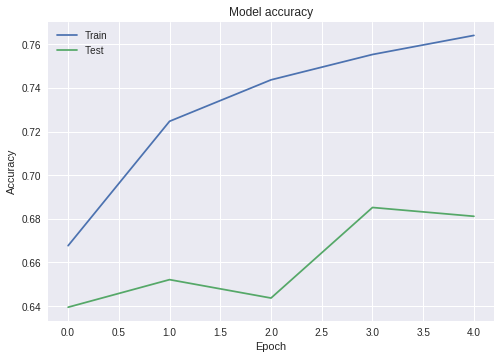

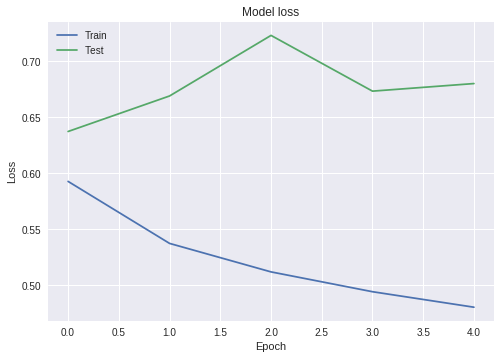

In [92]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_nn_w2v.history['acc'])
plt.plot(history_nn_w2v.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_nn_w2v.history['loss'])
plt.plot(history_nn_w2v.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# Save the final siamese neural network as a file for later use
siamese_net_w2v.save('siamese_net_w2v.h5')

In [188]:
loss, acc = siamese_net_w2v.evaluate([q1_test, q2_test], y_values_test)

40000/40000 [==============================] - 50s 1ms/step


#### Test Dataset Loss & Accuracy

In [190]:
print(loss)
print(acc)

0.6827462873935699
0.682025


# Generating the prediction value to feed to next classifier

In [0]:
pred_train_1 = siamese_network_glove.predict([q1_train, q2_train])

In [0]:
pred_train_2 = siamese_net_w2v.predict([q1_train, q2_train])

In [0]:
pred_train_features = []
for i in range(len(pred_train_1)):
  pred_val = []
  pred_val.append(pred_train_1[i][0])
  pred_val.append(pred_train_2[i][0])
  pred_train_features.append(pred_val)

In [99]:
print(pred_train_features[0])

[0.8789673, 0.9017826]


In [0]:
pred_test_1 = siamese_network_glove.predict([q1_test, q2_test])
pred_test_2 = siamese_net_w2v.predict([q1_test, q2_test])

In [0]:
pred_test_features = []
for i in range(len(pred_test_1)):
  pred_val = []
  pred_val.append(pred_test_1[i][0])
  pred_val.append(pred_test_2[i][0])
  pred_test_features.append(pred_val)

# Random Forest Implementation as Second Classifier

In [105]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Passing the predicted values from Glove and Word2Vec NN Models
clf.fit(pred_train_features, y_values_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [106]:
# Important features
print(clf.feature_importances_)

[0.5047785 0.4952215]


### Test the classifier

In [0]:
output_test_rf = clf.predict(pred_test_features)

In [114]:
pred_test_features[0]

[0.07918495, 0.14132118]

In [112]:
output_test_rf[0]

0

In [113]:
y_values_test[0]

0

In [110]:
print(len(output_test_rf))
print(len(y_values_test))

40000
40000


#### Note: Having issue running the calculation of Score

In [180]:
# Final Score of the Random Forest Classifier
# clf.score(output_test_rf, y_values_test)

# Calculate the accuracy values
accuracy = accuracy_score(output_test_rf, y_values_test)
print("Accuracy score is {}".format(accuracy))

Accuracy score is 0.745375


In [196]:
# Calculate the confusion matrix values
print("Confusion Matrix:")
print(confusion_matrix(output_test_rf, y_values_test))

Confusion Matrix:
[[20129  4998]
 [ 5187  9686]]


# SVM Implementation as Second Classifier

In [0]:
from sklearn import svm

clf_svm = svm.SVC(kernel = 'rbf', random_state = 0)

### Train the classifier

In [181]:
clf_svm.fit(pred_train_features[:50000], y_values_train[:50000])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

### Test the classifier 

In [0]:
output_test_svm = clf_svm.predict(pred_test_features)

In [183]:
pred_test_features[100]

[0.5209004, 0.020303784]

In [132]:
output_test_svm[100]

0

In [133]:
y_values_test[100]

0

#### Note: Having issue running the calculation of Score

In [194]:
# Final Score of the SVM
# clf_svm.score(output_test_svm, y_values_test)

# Calculate the accuracy values
accuracy = accuracy_score(output_test_svm, y_values_test)
print("Accuracy score is {}".format(accuracy))

Accuracy score is 0.752425


In [195]:
# Calculate the confusion matrix values
print("Confusion Matrix:")
print(confusion_matrix(output_test_svm, y_values_test))

Confusion Matrix:
[[20135  4722]
 [ 5181  9962]]


**Doc2Vec Similarity Calculation**

*Note: Additional analysis done on dataset for future enhancements*

In [0]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

doc_dataset = []
for i in range(len(q1_list)):
  if type(q1_list[i]) == str:
    doc_dataset.append(TaggedDocument(q1_list[i].split(), df_train[df_train.index == i].qid1))
  if type(q2_list[i]) == str:
    doc_dataset.append(TaggedDocument(q2_list[i].split(), df_train[df_train.index == i].qid2))

In [222]:
model_d2v = Doc2Vec()
model_d2v.build_vocab(doc_dataset)

print(model_d2v.corpus_count)

model_d2v.train(doc_dataset, total_examples=model_d2v.corpus_count, epochs = 5)

808577


In [225]:
model_d2v.most_similar('cat')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('dog', 0.8167130947113037),
 ('nose', 0.7036893367767334),
 ('mom', 0.682818591594696),
 ('tongue', 0.6657232046127319),
 ('leg', 0.6540833115577698),
 ('ears', 0.6488602757453918),
 ('kitten', 0.6471840739250183),
 ('girlfriend', 0.633624792098999),
 ('eyesight', 0.6291268467903137),
 ('stomach', 0.628257691860199)]

In [223]:
# To check memory usage
!free -m

              total        used        free      shared  buff/cache   available
Mem:          13022        8393         174          69        4454        6122
Swap:             0           0           0
